In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit, prange
import quantecon as qe

In [3]:
num_w_grid = 51
a, b = 200, 100  # Parameters of beta-binomial distribution

p = qe.distributions.BetaBinomial(num_w_grid-1, a, b).pdf()

In [4]:
w_min, w_max = 10, 60
w = np.linspace(w_min, w_max, num_w_grid)  # Wage offers

c = 25.  # Unemployment compensation

In [5]:
# Number of states
# s = 0, ..., len(w)-1: wage w[s] offered, s = len(w): no offer
num_states = len(w) + 1

In [6]:
beta = 0.99  # Discount factor

In [7]:
# Number of actions: 0: reject (continue), 1: accept (stop)
num_actions = 2

### Product formulation

In [14]:
# Reward array
R = np.empty((num_states, num_actions))

# At states s = 0, ..., num_states-2
# If reject, receive c
# If accept, receive present value of infinite flow of w[s]
R[:-1, 0] = c
R[:-1, 1] = w / (1 - beta)

# At state s = num_states-1
# Cannot reject (receive negative infinity); if accept, receive 0
R[-1, :] = -np.inf, 0

In [21]:
# Transition probability array
Q = np.zeros((num_states, num_actions, num_states))

# At states s = 0, ..., num_states-2
# If reject, draw s' according to p
# If accept, s' = num_state-1
Q[:-1, 0, :-1] = p
Q[:-1, 1, -1] = 1

# At state s = num_states-1
Q[-1, 0, -1] = 1  # Arbitrary
Q[-1, 1, -1] = 1

In [23]:
ddp = qe.markov.DiscreteDP(R, Q, beta)

In [26]:
res = ddp.solve()

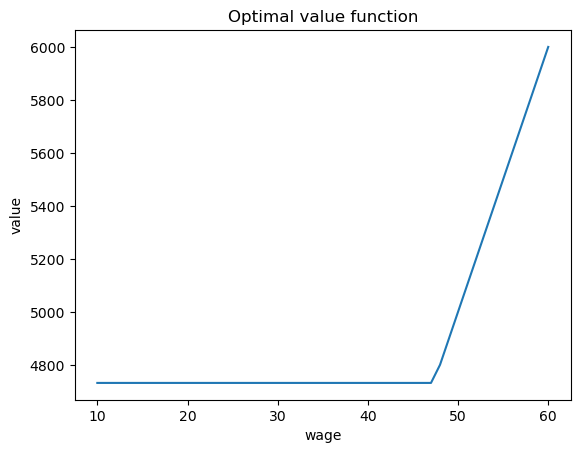

In [30]:
fig, ax = plt.subplots()
ax.set_xlabel('wage')
ax.set_ylabel('value')
ax.plot(w, res.v[:-1])
ax.set_title('Optimal value function')
plt.show()

The reservation utility $\bar{u}$, hence reservation wage
(which is state independent in this version) is given by
$$
\bar{u} = (1 - \beta) (u(c) + \beta p \cdot v),
$$
where the agent accept the wage offer $w$ if and only if $u(x) \geq \bar{u}$.

In [35]:
(1 - beta) * (c + beta * p @ res.v[:-1])

47.316499766606455